In [1]:
#building classification Sequential model with keras

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from tensorflow import keras

#Define Model

#classification

In [4]:
fmnist_data=keras.datasets.fashion_mnist


In [5]:
(x_train, y_train), (x_test, y_test)=fmnist_data.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
x_train.shape
#6000 pic (28,28)

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
 y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
 y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [10]:
#normalize our feature

In [11]:
x_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  0,   0,   0,   0, 200, 222, 209, 203, 215, 200,   0,  70,  98,
          0, 103,  59,  68,  71,  49,   0, 219, 206, 214, 210, 250,  38,
          0,   0],
       [  0,   0,   0,   0, 247, 218, 212, 210, 215, 214,   0, 254, 243,
        139, 255, 174, 251, 255, 205,   0, 215, 217, 214, 208, 220,  95,
          0,   0],
       [  0,   0,   0,  45, 226, 214, 214, 215, 224, 205,   0,  42,  35,
         60,  16,  17,  12,  13,  70,   0, 189, 216, 212, 206, 212, 156,
          0,   0],
       [  0,   0,   0, 164, 235, 214, 211, 220, 216, 201,  52,  71,  89,
         94,  83,  78,  70,  76,  92,  87, 206, 207, 222, 213, 219, 208,
          0,   0],
       [  0,   0,   0, 106, 187, 223, 237, 248, 211, 198, 252, 250, 248,
        245, 248, 252, 253, 250, 252, 239, 201, 212, 225, 215, 193, 113,
          0,   0],
       [  0,   0,   0,   0,   0,  17,  54, 159, 222, 193, 208, 192, 197,
        200, 200, 200, 200, 201, 203, 195, 210, 165,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  47, 225, 192, 214, 203, 206,
        204, 204, 205, 206, 204, 212, 197, 218, 107,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   6,   0,  46, 212, 195, 212, 202, 206,
        205, 204, 205, 206, 204, 212, 200, 218,  91,   0,   3,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,  11, 197, 199, 205, 202, 205,
        206, 204, 205, 207, 204, 205, 205, 218,  77,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3,   0,   2, 191, 198, 201, 205, 206,
        205, 205, 206, 209, 206, 199, 209, 219,  74,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 188, 197, 200, 207, 207,
        204, 207, 207, 210, 208, 198, 207, 221,  72,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 215, 198, 203, 206, 208,
        205, 207, 207, 210, 208, 200, 202, 222,  75,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 212, 198, 209, 206, 209,
        206, 208, 207, 211, 206, 205, 198, 221,  80,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 201, 205, 208, 207,
        205, 211, 205, 210, 210, 209, 195, 221,  96,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 202, 201, 205, 209, 207,
        205, 213, 206, 210, 209, 210, 194, 217, 105,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 204, 205, 208, 207,
        205, 215, 207, 210, 208, 211, 193, 213, 115,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 204, 207, 207, 208, 206,
        206, 215, 210, 210, 207, 212, 195, 210, 118,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 198, 208, 208, 208, 204,
        207, 212, 212, 210, 207, 211, 196, 207, 121,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   

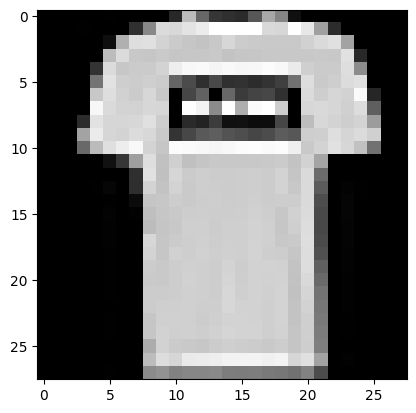

In [12]:
plt.imshow(x_train[1],cmap="gray")

In [13]:
#normalize our data

In [14]:
x_train,x_test= x_train/255.0, x_test/255.0

In [15]:
#x_train[1]

In [16]:
#building model with keras
#sequential model

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(100 , activation= "relu"))
model.add(keras.layers.Dense(75 , activation= "relu"))
#the number of output neurons ==the number of our output classes
#we set activation for last layer in (multilayer) softmax
model.add(keras.layers.Dense(10 , activation= "softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
#dense model doesnt undrestand 2 dimensional array which is our picture
# so in the first layer we have to give a vector as a data to our model
#we use flatten

In [19]:
model = keras.models.Sequential([
    (keras.layers.Flatten(input_shape=[28,28])),
    (keras.layers.Dense(100 , activation= "relu")),
    (keras.layers.Dense(75 , activation= "relu")),
    (keras.layers.Dense(10 , activation= "softmax"))
])

In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 75)                  │           7,575 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             760 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 86,835 (339.20 KB)

 Trainable params: 86,835 (339.20 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.layers

[<Flatten name=flatten_1, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [22]:
weights,bias=model.layers[1].get_weights()

In [23]:
weights.shape

(784, 100)

In [24]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

#Compile Model


In [25]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

#Fit Model

In [26]:
history=model.fit(x_train,y_train,epochs=50,validation_split=0.15)
#epochs=the number of times that our model see the whole data
#validation_data is sorta test data ,validation_split is better cause we dont need to use shuffle or another method to split the data for validation


Epoch 1/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6341 - loss: 1.1473 - val_accuracy: 0.8122 - val_loss: 0.5619
Epoch 2/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8176 - loss: 0.5301 - val_accuracy: 0.8219 - val_loss: 0.4995
Epoch 3/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8354 - loss: 0.4718 - val_accuracy: 0.8287 - val_loss: 0.4840
Epoch 4/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8418 - loss: 0.4522 - val_accuracy: 0.8496 - val_loss: 0.4385
Epoch 5/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8493 - loss: 0.4253 - val_accuracy: 0.8532 - val_loss: 0.4211
Epoch 6/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8592 - loss: 0.4067 - val_accuracy: 0.8560 - val_loss: 0.4141
Epoch 7/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8606 - loss: 0.3931 - val_accuracy: 0.8609 - val_loss: 0.4046
Epoch 8/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8692 - loss: 0.3715 - 

In [27]:

history.params


{'verbose': 'auto', 'epochs': 50, 'steps': 1594}

In [28]:
print(history.history)

{'accuracy': [0.7380784153938293, 0.8219019770622253, 0.83645099401474, 0.8458039164543152, 0.8539019823074341, 0.8576078414916992, 0.8625490069389343, 0.8665882349014282, 0.871137261390686, 0.8722745180130005, 0.8753921389579773, 0.8777647018432617, 0.8788039088249207, 0.883254885673523, 0.8843921422958374, 0.8866862654685974, 0.8871960639953613, 0.8900588154792786, 0.892627477645874, 0.8925490379333496, 0.8952353000640869, 0.8963137269020081, 0.8980196118354797, 0.8992941379547119, 0.9011764526367188, 0.9022156596183777, 0.9035882353782654, 0.9040588140487671, 0.905803918838501, 0.9072940945625305, 0.9083529114723206, 0.910392165184021, 0.9105686545372009, 0.9108627438545227, 0.913019597530365, 0.9136862754821777, 0.9143333435058594, 0.9161961078643799, 0.9159803986549377, 0.9173333048820496, 0.9179215431213379, 0.9203333258628845, 0.9210392236709595, 0.9206666946411133, 0.9220196008682251, 0.9233725666999817, 0.9234117865562439, 0.9249019622802734, 0.9258235096931458, 0.926764726638

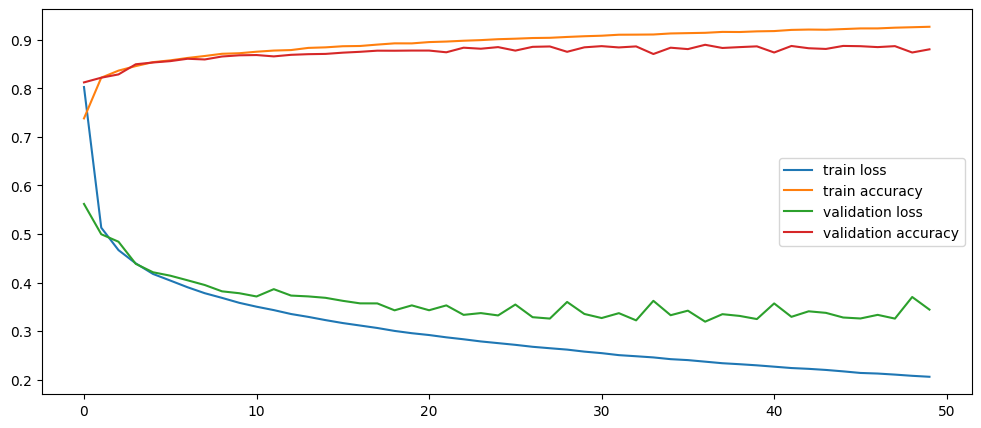

In [29]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(history.history["loss"],label="train loss")
ax.plot(history.history["accuracy"],label="train accuracy")
ax.plot(history.history["val_loss"],label="validation loss")
ax.plot(history.history["val_accuracy"],label="validation accuracy")
ax.legend()

#evaluate model on test data

In [30]:
model.evaluate(x_test,y_test,verbose=0)
#accuracy=0.8830999732017517

[0.3671080768108368, 0.8748999834060669]

In [31]:
x3 = x_test[1:3]

In [32]:
x3.shape

(2, 28, 28)

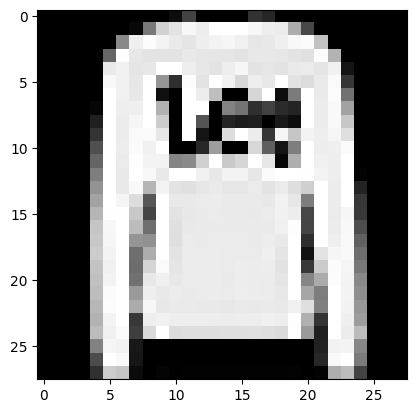

In [33]:
plt.imshow(x3[0],cmap="gray")

In [34]:
model.predict(x3).round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([[0.   , 0.   , 0.999, 0.   , 0.001, 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [35]:
model.predict(x3).shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


(2, 10)

In [36]:
np.argmax(model.predict(x3).round(3),axis=1)
#argmax show indices for biggest number in each row

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([2, 1])

In [37]:
y_test[1:3]

array([2, 1], dtype=uint8)

In [38]:
#now we can see that real target which is y_test is equal to our x3